# NumPy Tutorial
Adapted from the [CS231n Python tutorial](http://cs231n.github.io/python-numpy-tutorial/) by Justin Johnon and the [NumPy Tutorial](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/) by Aurélien Géron.

## Basics

NumPy
- is an optimized library for matrix and vector computation.
- is the core library for scientific computing in Python.
- makes use of C/C++ subroutines and memory-efficient data structures.
- provides a high-performance multidimensional array object, and tools for working with these arrays

To use NumPy, we first need to import the numpy package. Most people import it as `np`:

In [1]:
import numpy as np

### Why NumPy?
Vanilla Python:

In [2]:
%%time
a = list(range(int(1e6)))
b = list(range(int(1e6)))

CPU times: user 23.9 ms, sys: 16.4 ms, total: 40.3 ms
Wall time: 40 ms


In [3]:
%%time
for _ in range(10):
  c = []
  for i in range(len(a)):
    c.append(a[i] + 2 * b[i])

CPU times: user 1.93 s, sys: 66.9 ms, total: 1.99 s
Wall time: 1.99 s


With NumPy:

In [4]:
%%time
a = np.arange(int(1e6))
b = np.arange(int(1e6))

CPU times: user 20 ms, sys: 3.83 ms, total: 23.9 ms
Wall time: 22.7 ms


In [5]:
%%time
for _ in range(10):
  c = a + 2 * b

CPU times: user 35 ms, sys: 3.93 ms, total: 39 ms
Wall time: 47 ms


**Remember**: Vectorization
- is much faster (no type checking, collated memory)
- easier to read
- more closely resembles mathematical notation

## ndarrays: N-dimensional arrays

A numpy array

- is grid of values, all of the same type
- has fixed size at creation
- is indexed by tuple of nonnegative integers


### Some vocabulary
* In NumPy, each dimension is called an **axis**.
* The number of axes is called the **rank**.
    * For example, the above 3x4 matrix is an array of rank 2 (it is 2-dimensional).
    * The first axis has length 3, the second has length 4.
* An array's list of axis lengths is called the **shape** of the array.
    * For example, the above matrix's shape is `(3, 4)`.
    * The rank is equal to the shape's length.
* The **size** of an array is the total number of elements, which is the product of all axis lengths (eg. 3*4=12)


### Create Arrays
We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [6]:
a = np.array([1, 2, 3])  # Create a rank 1 array

print(type(a), a.shape, a[0], a[1], a[2])

a[0] = 5                 # Change an element of the array

print(a)
print('shape:', a.shape)
print('rank:', a.ndim)   # equal to len(a.shape)
print('size:', a.size)

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]
shape: (3,)
rank: 1
size: 3


In [7]:
a = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(a)
print('shape:', a.shape)
print('rank:', a.ndim)
print('size:', a.size)

[[1 2 3]
 [4 5 6]]
shape: (2, 3)
rank: 2
size: 6


Numpy also provides many functions to create arrays:

In [8]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [9]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [10]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [11]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [12]:
e = np.random.rand(2,2) # Create an array filled with random values
print(e)

[[0.09920291 0.46795971]
 [0.01354397 0.82522054]]


In [13]:
f = np.random.randn( 2,2 ) # Create an array filled with normally distributed values
print(f)

[[ 0.6544716   0.436052  ]
 [ 0.16315808 -1.70187365]]


To give you a feel of what these distributions look like, let's use matplotlib (see the [matplotlib tutorial](tools_matplotlib.ipynb) for more details):

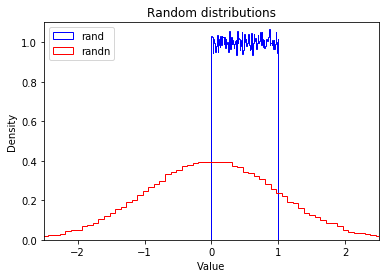

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(np.random.rand(100000), density=True, bins=100, histtype="step", color="blue", label="rand")
plt.hist(np.random.randn(100000), density=True, bins=100, histtype="step", color="red", label="randn")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

You can create an `ndarray` using NumPy's `range` function (similar to python's built-in `range` function):

In [15]:
g = np.arange(1, 5, .5)
print(g)

[1.  1.5 2.  2.5 3.  3.5 4.  4.5]


However, when dealing with floats, the exact number of elements in the array is not always predictible. For example, consider this:

In [16]:
print(np.arange(0, 5/3, 1/3)) # depending on floating point errors, the max value is 4/3 or 5/3.
print(np.arange(0, 5/3, 0.333333333))
print(np.arange(0, 5/3, 0.333333334))

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333334]


For this reason, it is generally preferable to use the `linspace` function instead of `arange` when working with floats. The `linspace` function returns an array containing a specific number of points evenly distributed between two values (note that the maximum value is *included*, contrary to `arange`):

In [17]:
h = np.linspace(0, 5/3, 6)
print(h)
h = np.linspace(1, 4.5, 8)
print(h)

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[1.  1.5 2.  2.5 3.  3.5 4.  4.5]


Instead of linear spacing, you can also create arrays with logarithmic spacing:

In [18]:
i = np.logspace(0, 3, 4)
print(i)

[   1.   10.  100. 1000.]


### Data Types
NumPy's `ndarray`s are also efficient in part because all their elements must have the same type (usually numbers).
You can check what the data type is by looking at the `dtype` attribute:

In [19]:
c = np.arange(1, 5)
print(c.dtype, c)

int64 [1 2 3 4]


In [20]:
c = np.arange(1.0, 5.0)
print(c.dtype, c)

float64 [1. 2. 3. 4.]


Instead of letting NumPy guess what data type to use, you can set it explicitly when creating an array by setting the `dtype` parameter:

In [21]:
d = np.arange(1, 5, dtype=np.float16) # half precision float
print(d.dtype, d)

d = np.arange(1, 5, dtype=np.complex64)
print(d.dtype, d)

float16 [1. 2. 3. 4.]
complex64 [1.+0.j 2.+0.j 3.+0.j 4.+0.j]


Available data types include `int8`, `int16`, `int32`, `int64`, `uint8`|`16`|`32`|`64`, `float16`|`32`|`64` and `complex64`|`128`. Check out [the documentation](http://docs.scipy.org/doc/numpy-1.10.1/user/basics.types.html) for the full list.

The `itemsize` attribute returns the size (in bytes) of each item:

In [22]:
d = np.arange(1, 5, dtype=np.float16) # half precision float
print(d.dtype, d, d.itemsize)

d = np.arange(1, 5, dtype=np.float32) # single precision float
print(d.dtype, d, d.itemsize)

d = np.arange(1, 5, dtype=np.float64) # double precision float
print(d.dtype, d, d.itemsize)


float16 [1. 2. 3. 4.] 2
float32 [1. 2. 3. 4.] 4
float64 [1. 2. 3. 4.] 8


## Reshaping an array

### In place
Changing the shape of an `ndarray` is as simple as setting its `shape` attribute. However, the array's size must remain the same.

In [23]:
g = np.arange(24)
print(g)
print("Rank:", g.ndim)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Rank: 1


In [24]:
g.shape = (6, 4)
print(g)
print("Rank:", g.ndim)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
Rank: 2


In [25]:
g.shape = (2, 3, 4)
print(g)
print("Rank:", g.ndim)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
Rank: 3


### `reshape`
The `reshape` function returns a new `ndarray` object pointing at the *same* data. This means that modifying one array will also modify the other. More on data views and copies later.

In [26]:
g2 = g.reshape(4,6)
print(g2)
print("Rank:", g2.ndim)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
Rank: 2


Set item at row 1, col 2 to 999 (more about indexing below).

In [27]:
g2[1, 2] = 999
print(g2)

[[  0   1   2   3   4   5]
 [  6   7 999   9  10  11]
 [ 12  13  14  15  16  17]
 [ 18  19  20  21  22  23]]


The corresponding element in `g` has been modified.

In [28]:
print(g)

[[[  0   1   2   3]
  [  4   5   6   7]
  [999   9  10  11]]

 [[ 12  13  14  15]
  [ 16  17  18  19]
  [ 20  21  22  23]]]


### `ravel`
The `ravel` function returns a new one-dimensional `ndarray` that also points to the same data:

In [29]:
g.ravel()

array([  0,   1,   2,   3,   4,   5,   6,   7, 999,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23])

### flatten
For a one-dimensional **copy** of the data, use the `flatten` function:

In [30]:
g3 = g2.flatten()
print(g3.shape, g2.shape)

(24,) (4, 6)


Apart from flattening arrays, we frequently need to transpose a matrix:

In [31]:
print(g2.T)

[[  0   6  12  18]
 [  1   7  13  19]
 [  2 999  14  20]
 [  3   9  15  21]
 [  4  10  16  22]
 [  5  11  17  23]]


## Array indexing

### One-dimensional arrays
One-dimensional NumPy arrays can be accessed more or less like regular python arrays:

In [32]:
a = np.array([1, 5, 3, 19, 13, 7, 3])
a[3]

19

In [33]:
a[2:5]

array([ 3, 19, 13])

In [34]:
a[2:-1]

array([ 3, 19, 13,  7])

In [35]:
a[:2]

array([1, 5])

In [36]:
a[2::2]

array([ 3, 13,  3])

In [37]:
a[::-1]

array([ 3,  7, 13, 19,  3,  5,  1])

Of course, you can modify elements:

In [38]:
a[3]=999
a

array([  1,   5,   3, 999,  13,   7,   3])

You can also modify an `ndarray` slice:

In [39]:
a[2:5] = [997, 998, 999]
a

array([  1,   5, 997, 998, 999,   7,   3])

Of course, you cannot grow or shrink `ndarray`s this way:

In [40]:
try:
    a[2:5] = [1,2,3,4,5,6]  # too long
except ValueError as e:
    print(e)

cannot copy sequence with size 6 to array axis with dimension 3


You cannot delete elements either:

In [41]:
try:
    del a[2:5]
except ValueError as e:
    print(e)

cannot delete array elements


### Multi-dimensional arrays
Multi-dimensional arrays can be accessed in a similar way by providing an index or slice for each axis, separated by commas:

In [42]:
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [43]:
b[1, 2]  # row 1, col 2

14

In [44]:
b[1, :]  # row 1, all columns

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [45]:
b[:, 1]  # all rows, column 1

array([ 1, 13, 25, 37])

**Caution**: note the subtle difference between these two expressions: 

In [46]:
b[1, :]

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [47]:
b[1:2, :]

array([[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

The first expression returns row 1 as a 1D array of shape `(12,)`, while the second returns that same row as a 2D array of shape `(1, 12)`.

### Fancy indexing
You may also specify a list of indices that you are interested in. This is referred to as *fancy indexing*.

In [48]:
b[(0,2), 2:5]  # rows 0 and 2, columns 2 to 4 (5-1)

array([[ 2,  3,  4],
       [26, 27, 28]])

In [49]:
b[:, (-1, 2, -1)]  # all rows, columns -1 (last), 2 and -1 (again, and in this order)

array([[11,  2, 11],
       [23, 14, 23],
       [35, 26, 35],
       [47, 38, 47]])

If you provide multiple index arrays, you get a 1D `ndarray` containing the values of the elements at the specified coordinates.

In [50]:
b[(-1, 2, -1, 2), (5, 9, 1, 9)]  # returns a 1D array with b[-1, 5], b[2, 9], b[-1, 1] and b[2, 9] (again)

array([41, 33, 37, 33])

### Higher dimensions
Everything works just as well with higher dimensional arrays, but it's useful to look at a few examples:

In [51]:
c = b.reshape(4,2,6)
c

array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]],

       [[12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]],

       [[24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]],

       [[36, 37, 38, 39, 40, 41],
        [42, 43, 44, 45, 46, 47]]])

In [52]:
c[2, 1, 4]  # matrix 2, row 1, col 4

34

In [53]:
c[2, :, 3]  # matrix 2, all rows, col 3

array([27, 33])

If you omit coordinates for some axes, then all elements in these axes are returned:

In [54]:
c[2, 1]  # Return matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]

array([30, 31, 32, 33, 34, 35])

### Ellipsis (`...`)
You may also write an ellipsis (`...`) to ask that all non-specified axes be entirely included.

In [55]:
c[2, ...]  #  matrix 2, all rows, all columns.  This is equivalent to c[2, :, :]

array([[24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [56]:
c[2, 1, ...]  # matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]

array([30, 31, 32, 33, 34, 35])

In [57]:
c[2, ..., 3]  # matrix 2, all rows, column 3.  This is equivalent to c[2, :, 3]

array([27, 33])

In [58]:
c[..., 3]  # all matrices, all rows, column 3.  This is equivalent to c[:, :, 3]

array([[ 3,  9],
       [15, 21],
       [27, 33],
       [39, 45]])

### Boolean indexing
You can also provide an `ndarray` of boolean values on one axis to specify the indices that you want to access.

In [59]:
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [60]:
rows_on = np.array([True, False, True, False])
b[rows_on, :]  # Rows 0 and 2, all columns. Equivalent to b[(0, 2), :]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [61]:
cols_on = np.array([False, True, False] * 4)
b[:, cols_on]  # All rows, columns 1, 4, 7 and 10

array([[ 1,  4,  7, 10],
       [13, 16, 19, 22],
       [25, 28, 31, 34],
       [37, 40, 43, 46]])

In [62]:
b[np.ix_(rows_on, cols_on)]

array([[ 1,  4,  7, 10],
       [25, 28, 31, 34]])

In [63]:
np.ix_(rows_on, cols_on)

(array([[0],
        [2]]), array([[ 1,  4,  7, 10]]))

If you use a boolean array that has the same shape as the `ndarray`, then you get in return a 1D array containing all the values that have `True` at their coordinate. This is generally used along with conditional operators:

In [64]:
b[b % 3 == 1]

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46])

## Arithmetic Operations

### Elementwise Array Operations
All the usual arithmetic operators (`+`, `-`, `*`, `/`, `//`, `**`, etc.) can be used with `ndarray`s. They apply *elementwise*. The arrays must have the same shape. If they do not, NumPy will apply the *broadcasting* rules. More on broadcasting later.

Most operations are available as functions in the numpy namespace as well as instance methods:

In [65]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

In [66]:
# Elementwise sum
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [67]:
# Elementwise difference
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [68]:
# Elementwise division
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [69]:
# Elementwise square root
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


In [70]:
# Elementwise product
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


Note that the multiplication is *not* a matrix multiplication. We will discuss matrix operations next.

### Array Operations

We use the `dot` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices:

In [71]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors
print(v.dot(w))
print(np.dot(v, w))

219
219


In [72]:
# Matrix / vector product
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [0]:
# Matrix / matrix product
print(x.dot(y))
print(np.dot(x, y))

### Mathematical and statistical functions
NumPy provides many useful functions for performing computations on arrays; one of the most useful is `sum`. Note that this computes the sum of all array elements, regardless of its shape:

In [73]:
x = np.array([[1,2],[3,4]])
print(x.sum())
print(np.sum(x))

10
10


Here are a few more useful `ndarray` methods. You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

In [74]:
for func in (x.min, x.max, x.mean, x.prod, x.std, x.var):
    print(func.__name__, "=", func())

min = 1
max = 4
mean = 2.5
prod = 24
std = 1.118033988749895
var = 1.25


These functions accept an optional argument `axis` which lets you ask for the operation to be performed on elements along the given axis. For example:

In [75]:
print(np.sum(x, axis=0))  # Compute sum of each column
print(np.sum(x, axis=1))  # Compute sum of each row

[4 6]
[3 7]


## Broadcasting

In general, when NumPy expects arrays of the same shape but finds that this is not the case, it applies the so-called *broadcasting* rules:

### First rule
*If the arrays do not have the same rank, then a 1 will be prepended to the smaller ranking arrays until their ranks match.*

In [76]:
h = np.arange(5).reshape(1, 1, 5)
print(h)

[[[0 1 2 3 4]]]


Now let's try to add a 1D array of shape `(5,)` to this 3D array of shape `(1,1,5)`. Applying the first rule of broadcasting!

In [78]:
i =h + [10, 20, 30, 40, 50]  # same as: h + [[[10, 20, 30, 40, 50]]]
print(i)

[[[10 21 32 43 54]]]


### Second rule
*Arrays with a 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is repeated along that dimension.*

In [79]:
k = np.arange(6).reshape(2, 3)
print(k)

[[0 1 2]
 [3 4 5]]


Let's try to add a 2D array of shape `(2,1)` to this 2D `ndarray` of shape `(2, 3)`. NumPy will apply the second rule of broadcasting:

In [80]:
k + [[100], [200]]  # same as: k + [[100, 100, 100], [200, 200, 200]]

array([[100, 101, 102],
       [203, 204, 205]])

Combining rules 1 & 2, we can do this:

In [81]:
k + [100, 200, 300]  # after rule 1: [[100, 200, 300]], and after rule 2: [[100, 200, 300], [100, 200, 300]]

array([[100, 201, 302],
       [103, 204, 305]])

And also, very simply:

In [82]:
k + 1000  # same as: k + [[1000, 1000, 1000], [1000, 1000, 1000]]

array([[1000, 1001, 1002],
       [1003, 1004, 1005]])

### Third rule
*After rules 1 & 2, the sizes of all arrays must match.*

In [83]:
try:
    k + [33, 44]
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (2,3) (2,) 


Broadcasting rules are used in many NumPy operations, not just arithmetic operations. For more details about broadcasting, check out [the documentation](https://docs.scipy.org/doc/numpy-dev/user/basics.broadcasting.html).

## Upcasting
When trying to combine arrays with different `dtype`s, NumPy will *upcast* to a type capable of handling all possible values (regardless of what the *actual* values are).

In [84]:
k1 = np.arange(0, 5, dtype=np.uint8)
print(k1.dtype, k1)

uint8 [0 1 2 3 4]


In [85]:
k2 = k1 + np.array([5, 6, 7, 8, 9], dtype=np.int8)
print(k2.dtype, k2)

int16 [ 5  7  9 11 13]


Note that `int16` is required to represent all *possible* `int8` and `uint8` values (from -128 to 255), even though in this case a uint8 would have sufficed.

In [86]:
k3 = k1 + 1.5
print(k3.dtype, k3)

float64 [1.5 2.5 3.5 4.5 5.5]


## Mutation by Slicing (Views vs. Copies)
Depending on the operation, results can be copies or views, i.e., data is shared between view and the array.
Keep in mind that slices produce views:

In [87]:
x = np.arange(5)
print(x)

view = x[1:3]
print(view)

view[1] = -1
print(x)

x[2] = 999
print(view)

[0 1 2 3 4]
[1 2]
[ 0  1 -1  3  4]
[  1 999]


Fancy indexing instead produces copies:

In [88]:
x = np.arange(5)
print(x)

copy = x[[1, 2]]
print(copy)

copy[1] = -1
print(x)

x[2] = 999
print(copy)

[0 1 2 3 4]
[1 2]
[0 1 2 3 4]
[ 1 -1]


# Summary
NumPy is a powerful library for computation providing both massive efficiency gains and convenience. 


## Take home:
* Vectorize! Orders of magnitude faster.
* Keeping track of the shape of your arrays is often useful.
* Many useful math functions and operations built into NumPy.
* Select and manipulate arbitrary pieces of data with powerful indexing schemes. • Broadcasting allows for computation across arrays of different shapes.
* Watch out for views vs. copies.


### What else?

NumPy contains many more options and functions than discussed today. The best way to learn more is to experiment with NumPy, and go through the excellent [reference documentation](http://docs.scipy.org/doc/numpy/reference/index.html) to find more functions and features you may be interested in.